In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import glob
import os


In [3]:
min_row = 21
min_col = 5
max_row = 25
max_col = 8

file_names = [f"r_{row:02}_c_{col:02}" for row in range(min_row, max_row+1) for col in range(min_col, max_col+1)]

file_names

['r_21_c_05',
 'r_21_c_06',
 'r_21_c_07',
 'r_21_c_08',
 'r_22_c_05',
 'r_22_c_06',
 'r_22_c_07',
 'r_22_c_08',
 'r_23_c_05',
 'r_23_c_06',
 'r_23_c_07',
 'r_23_c_08',
 'r_24_c_05',
 'r_24_c_06',
 'r_24_c_07',
 'r_24_c_08',
 'r_25_c_05',
 'r_25_c_06',
 'r_25_c_07',
 'r_25_c_08']

In [5]:
path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/'

# Add the path to the file names
file_paths = [f"{path}{file}_combined.nc" for file in file_names]

# Get the list of files that exist in the directory
existing_files = [file for file in file_paths if glob.glob(file)]
existing_files

['/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_06_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_07_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_08_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_06_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_07_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_08_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_06_combined.nc',
 '/Volumes/Seagate/C

In [40]:
existing_files[17]

'/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_25_c_06_combined.nc'

## Look at some individual cells. 
Yup, looks right. 

..except the axis ??!

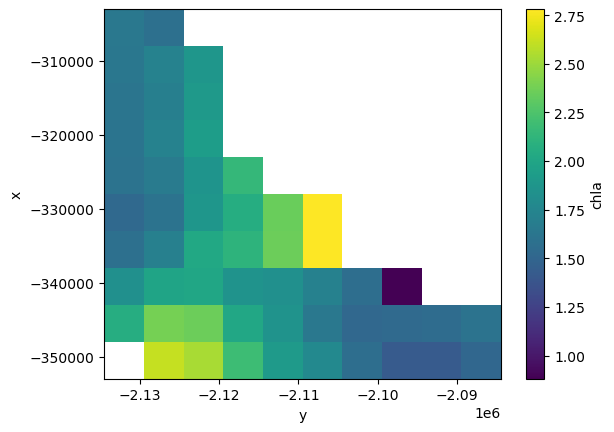

In [29]:
# r_25_c_06
ds = xr.open_dataset(existing_files[17])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

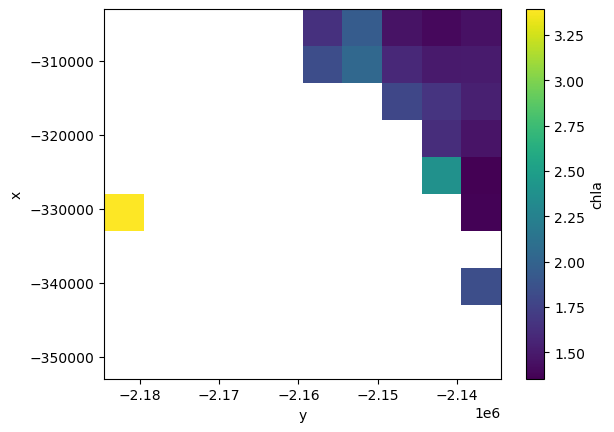

In [47]:
# r_24_c_06
ds = xr.open_dataset(existing_files[13])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

notice that the plot above and its array below are reflected. maybe this is normal

In [48]:
ds_mean

<xarray.Dataset>
Dimensions:  (x: 10, y: 10)
Coordinates:
  * x        (x) int64 -350475 -345475 -340475 ... -315475 -310475 -305475
  * y        (y) int64 -2181975 -2176975 -2171975 ... -2146975 -2141975 -2136975
Data variables:
    chla     (x, y) float64 nan nan nan nan nan ... 1.942 1.457 1.397 1.449

### Stitching didn't go as planned
maybe it has to do with the weird coords. 

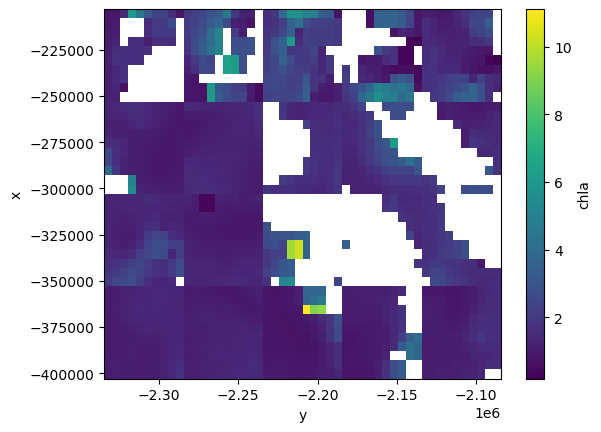

In [33]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(existing_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

### Swap the axis in the data. 
then flip the plot and rotate it.
 
it works i guess????

In [54]:
import os
import xarray as xr

output_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed'

# Create the output path if it does not exist
os.makedirs(output_path, exist_ok=True)

for file in existing_files:
    # Open the file as a dataset
    ds = xr.open_dataset(file)

    # Get the chla data and swap the x and y dimensions
    chla_data = ds.chla.values
    swapped_data = chla_data.swapaxes(1, 2)

    # Create a new DataArray with the swapped data and the original coordinates
    swapped_da = xr.DataArray(swapped_data, coords=ds.chla.coords, dims=ds.chla.dims)

    # Create a new Dataset from the DataArray
    swapped_ds = swapped_da.to_dataset(name='chla')

    # Get the base name of the file
    base_name = os.path.basename(file)

    # Create the output file path
    output_file = os.path.join(output_path, base_name)

    # Save the swapped dataset to a new file
    swapped_ds.to_netcdf(output_file)

In [55]:
# glob all the files in output_path
transposed_files = glob.glob(f"{output_path}/*.nc")

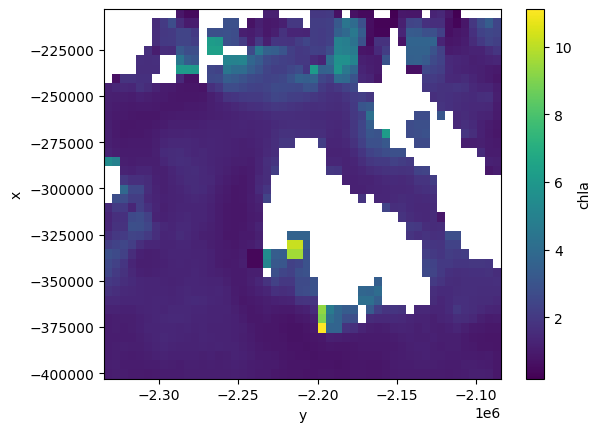

In [56]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

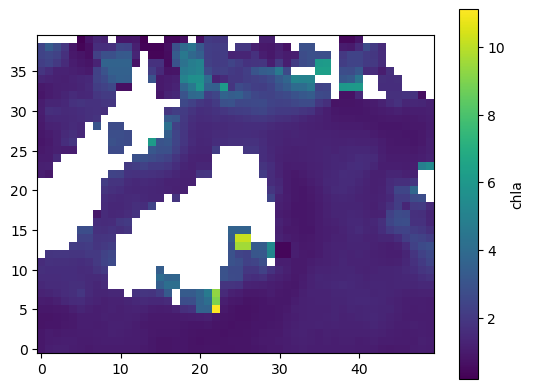

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# Get the mean of the chla through time dimension
ds_mean = ds.mean(dim='time')

# Get the chla data as a 2D numpy array and flip it along the x-axis
chla_data = np.fliplr(ds_mean.chla.values)

# Create a new figure
plt.figure()

# Plot a heatmap of the mean chla
plt.imshow(chla_data, origin='lower')

# Add a colorbar
plt.colorbar(label='chla')

# Show the plot
plt.show()

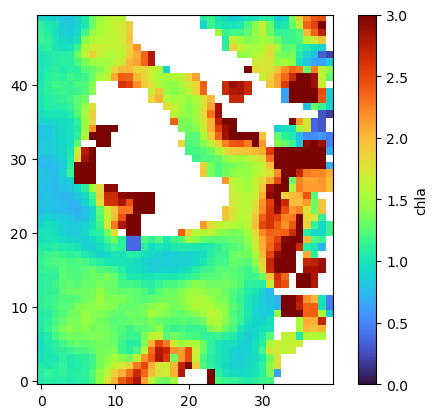

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# Get the mean of the chla through time dimension
ds_mean = ds.mean(dim='time')

# Get the chla data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
chla_data = np.fliplr(ds_mean.chla.values)
rotated_data = np.rot90(chla_data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the mean chla
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=0, vmax=3)

# Add a colorbar
plt.colorbar(label='chla')

# Show the plot
plt.show()

# trendlines?

In [72]:
# create 'time.year' with the first 4 characters of time 
ds['time.year'] = ds.time.astype(str).str[:4]
annual_grouped = ds.groupby('time.year')

In [75]:
annual_grouped['1999']

<xarray.Dataset>
Dimensions:    (x: 40, y: 50, time: 362)
Coordinates:
  * x          (x) int64 -400475 -395475 -390475 ... -215475 -210475 -205475
  * y          (y) int64 -2331975 -2326975 -2321975 ... -2091975 -2086975
  * time       (time) int64 19990101 19990102 19990103 ... 19991230 19991231
Data variables:
    chla       (time, x, y) float64 dask.array<chunksize=(362, 10, 10), meta=np.ndarray>
    time.year  (time) <U4 '1999' '1999' '1999' '1999' ... '1999' '1999' '1999'

In [106]:
# for each group, get the mean along the time dimension
annual_mean = annual_grouped.mean(dim='time')

In [118]:
# calculate the slope of the annual mean at each pixel
annual_slope = annual_mean.chla.polyfit(dim='time.year', deg=1)
annual_slope


<xarray.Dataset>
Dimensions:               (degree: 2, x: 40, y: 50)
Coordinates:
  * degree                (degree) int64 1 0
  * x                     (x) int64 -400475 -395475 -390475 ... -210475 -205475
  * y                     (y) int64 -2331975 -2326975 ... -2091975 -2086975
Data variables:
    polyfit_coefficients  (degree, x, y) float64 dask.array<chunksize=(2, 2, 50), meta=np.ndarray>

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

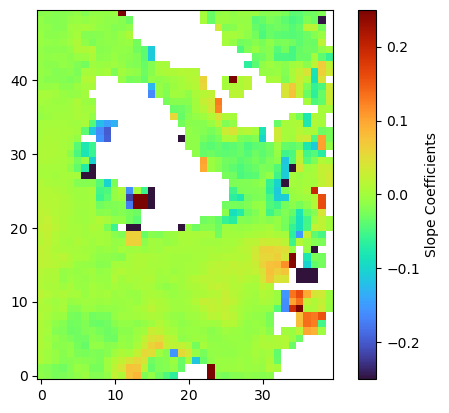

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

In [153]:
# get the annual_mean values for index [0,0] for each year as a dictionary
annual_mean_values = {year: annual_mean.chla.isel(x=0, y=0).sel({'time.year': year}).values for year in annual_mean['time.year'].values}

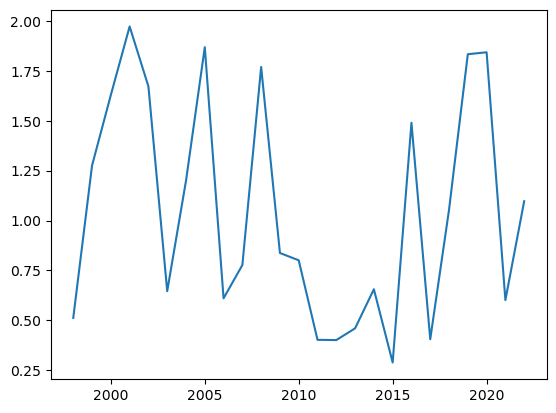

In [155]:
# plot annual_mean_values for the first pixel
plt.plot(annual_mean_values.keys(), annual_mean_values.values())
plt.show()


In [161]:
#`linregress(years, values)` calculates the least-squares regression for the years and values. 
# The `slope` and `intercept` are the parameters of the trendline.

from scipy.stats import linregress

# Extract years and values from the dictionary
years = list(annual_mean_values.keys())
values = list(annual_mean_values.values())

# Remove pairs where value is NaN
pairs = [(year, value) for year, value in zip(years, values) if not np.isnan(value)]
years, values = zip(*pairs)

# Calculate the trendline
slope, intercept, r_value, p_value, std_err = linregress(years, values)

# Print the equation of the trendline
print(f"y = {slope} * x + {intercept}")

y = -0.012490304048118274 * x + 26.149500870707897


In [162]:
annual_mean

<xarray.Dataset>
Dimensions:    (x: 40, y: 50, time.year: 26)
Coordinates:
  * x          (x) int64 -400475 -395475 -390475 ... -215475 -210475 -205475
  * y          (y) int64 -2331975 -2326975 -2321975 ... -2091975 -2086975
  * time.year  (time.year) int64 1998 1999 2000 2001 ... 2020 2021 2022 2023
Data variables:
    chla       (time.year, x, y) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>

### get the slopes of the trends for all pixels. 

End result looks exactly the same as the polyfit that warned about being super ill conditioned except this method is super slow and polyfit ran fast. 

In [164]:
from scipy.stats import linregress

# Initialize a 2D matrix for the slopes
slopes = np.empty((40, 50))

# Iterate over the 'x' and 'y' dimensions
for i in range(40):
    for j in range(50):
        # Get the annual_mean values for the current pixel for each year
        annual_mean_values = {year: annual_mean.chla.isel(x=i, y=j).sel({'time.year': year}).values for year in annual_mean['time.year'].values}

        # Extract years and values from the dictionary
        years = list(annual_mean_values.keys())
        values = list(annual_mean_values.values())

        # Remove pairs where value is NaN
        pairs = [(year, value) for year, value in zip(years, values) if not np.isnan(value)]

        # Skip the calculation if all values are NaN
        if not pairs:
            slopes[i, j] = np.nan
            continue

        years, values = zip(*pairs)

        # Calculate the trendline
        slope, intercept, r_value, p_value, std_err = linregress(years, values)

        # Store the slope in the matrix
        slopes[i, j] = slope

# Print the slopes matrix
print(slopes)

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[[-0.0124903  -0.01486278  0.0067407  ... -0.01050104 -0.01004369
  -0.0157671 ]
 [-0.01602077 -0.01886751 -0.00243205 ... -0.01263503 -0.01731923
  -0.01531853]
 [-0.02373884 -0.02496131 -0.00850036 ... -0.01806153 -0.01909027
  -0.01873629]
 ...
 [        nan         nan         nan ...  0.01633393 -0.03094848
  -0.0274791 ]
 [        nan         nan         nan ... -0.02715275 -0.24660813
  -0.02052048]
 [        nan         nan         nan ...         nan         nan
          nan]]


/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

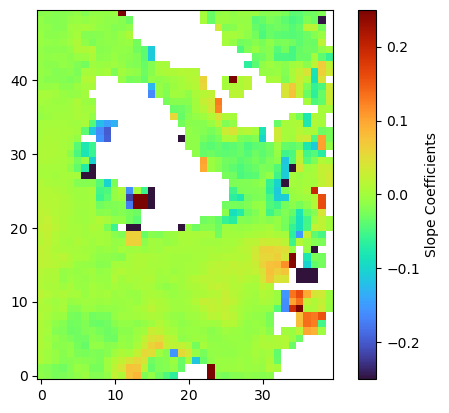

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

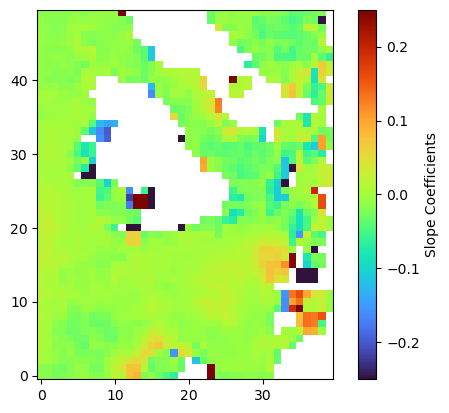

In [165]:
# plot slopes as heatmap. first flip across the x axis, then rotate 90 degrees clockwise
plt.imshow(np.rot90(np.fliplr(slopes)), origin='lower', cmap='turbo', vmin=-.25, vmax=.25)
plt.colorbar(label='Slope Coefficients')
plt.show()



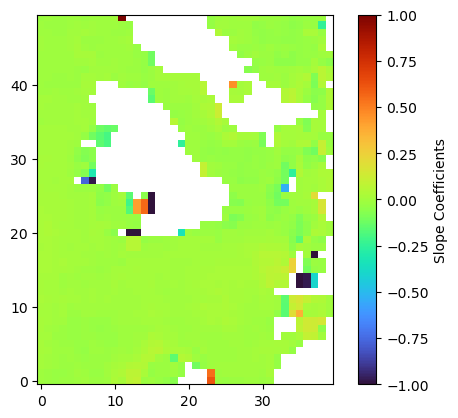

In [169]:
# plot slopes as heatmap. first flip across the x axis, then rotate 90 degrees clockwise
plt.imshow(np.rot90(np.fliplr(slopes)), origin='lower', cmap='turbo', vmin=-1, vmax=1)
plt.colorbar(label='Slope Coefficients')
plt.show()



In [136]:
annual_mean.chla

<xarray.DataArray 'chla' (time.year: 26, x: 40, y: 50)>
dask.array<concatenate, shape=(26, 40, 50), dtype=float64, chunksize=(1, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) int64 -400475 -395475 -390475 ... -215475 -210475 -205475
  * y          (y) int64 -2331975 -2326975 -2321975 ... -2091975 -2086975
  * time.year  (time.year) object '1998' '1999' '2000' ... '2021' '2022' '2023'

lol no

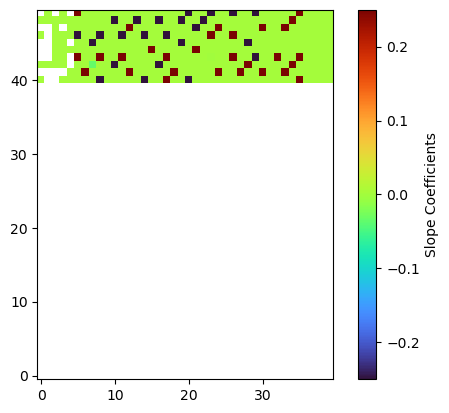

In [144]:
# Convert 'time.year' to numeric
time_years = pd.to_numeric(annual_mean['time.year'], errors='coerce')

# Calculate the slope for each cell
slopes = np.empty_like(annual_mean.chla.isel({'time.year': 0}).values)
for i in range(annual_mean.chla.isel({'time.year': 0}).shape[0]):
    for j in range(annual_mean.dims['x']):
        slope, intercept, r_value, p_value, std_err = linregress(time_years, annual_mean.chla.isel(x=j, y=i).values)
        slopes[i, j] = slope

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slopes)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()